In [ ]:
!pip install mysql-connector-python

In [2]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#creating connection between mysql and python
connection=mysql.connector.connect(
    host="localhost",
    user="root",
    password="password",
    database="agridata"
)
cursor=connection.cursor()

In [5]:
#creating a database schema
query="create database agridata"
cursor.execute(query)

In [ ]:
#To show the list of database
query="show databases"
cursor.execute(query)
for data in cursor:
    print(data)


In [3]:
# Read the excel file
df=pd.read_excel(r"C:\Datascience_project2_Agridata\ICRISAT-District Level Data.xlsx")
df

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [6]:
#check the sum of null values in the dataframe
df.isna().sum()

Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64

In [7]:
#To confirm if there are no null values in the dataframe
df.isnull().values.any()

np.False_

In [8]:
#Check for any duplicate rows
dupe_count = df.duplicated().sum()
print("Duplicate rows:", dupe_count)

Duplicate rows: 0


In [9]:
#view the no. of rows and columns of dataframe:
df.shape

(16146, 80)

In [10]:
#view the datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [12]:
df['State Name'].value_counts()

State Name
Uttar Pradesh       2392
Madhya Pradesh      1924
Rajasthan           1352
Maharashtra         1348
Karnataka            988
Gujarat              936
West Bengal          774
Orissa               676
Tamil Nadu           624
Bihar                572
Andhra Pradesh       572
Punjab               572
Himachal Pradesh     520
Assam                520
Kerala               516
Telangana            468
Uttarakhand          416
Haryana              364
Chhattisgarh         312
Jharkhand            300
Name: count, dtype: int64

In [88]:
df['Dist Name'].value_counts()

Dist Name
Gaya             52
Durg             52
Malda            52
Darjeeling       52
Jalpaiguri       52
                 ..
Dhanbad          50
Singhbhum        50
Bombay           48
Malappuram       48
West Dinajpur    46
Name: count, Length: 311, dtype: int64

In [ ]:
#Identify numeric columns for Outlier detection

target_cols = [col for col in df.columns if any(x in col for x in ["AREA", "PRODUCTION", "YIELD"])]
print(f"{len(target_cols)} numeric crop columns for outlier detection")


#Detect Outliers (IQR method)
outlier_summary = {}

for col in target_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)

# Display only columns with outliers
outlier_summary = {k: v for k, v in outlier_summary.items() if v > 0}
pd.Series(outlier_summary).sort_values(ascending=False)

RABI SORGHUM PRODUCTION (1000 tons)       4052
RABI SORGHUM AREA (1000 ha)               4040
RABI SORGHUM YIELD (Kg per ha)            4033
SOYABEAN AREA (1000 ha)                   3845
SOYABEAN PRODUCTION (1000 tons)           3648
                                          ... 
SORGHUM YIELD (Kg per ha)                  135
GROUNDNUT YIELD (Kg per ha)                127
KHARIF SORGHUM YIELD (Kg per ha)           112
RAPESEED AND MUSTARD YIELD (Kg per ha)      89
SUGARCANE YIELD (Kg per ha)                 45
Length: 75, dtype: int64

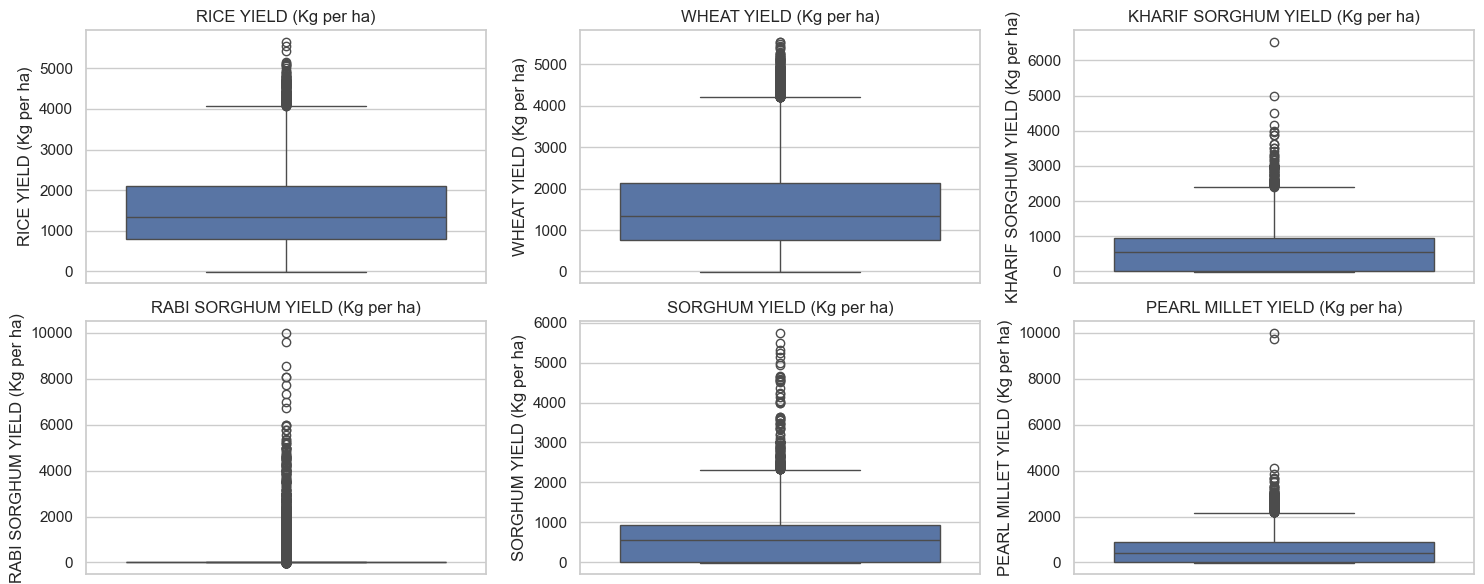

In [102]:
sample_yield_cols = [col for col in df.columns if "YIELD" in col][:6]

plt.figure(figsize=(15, 6))
for i, col in enumerate(sample_yield_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

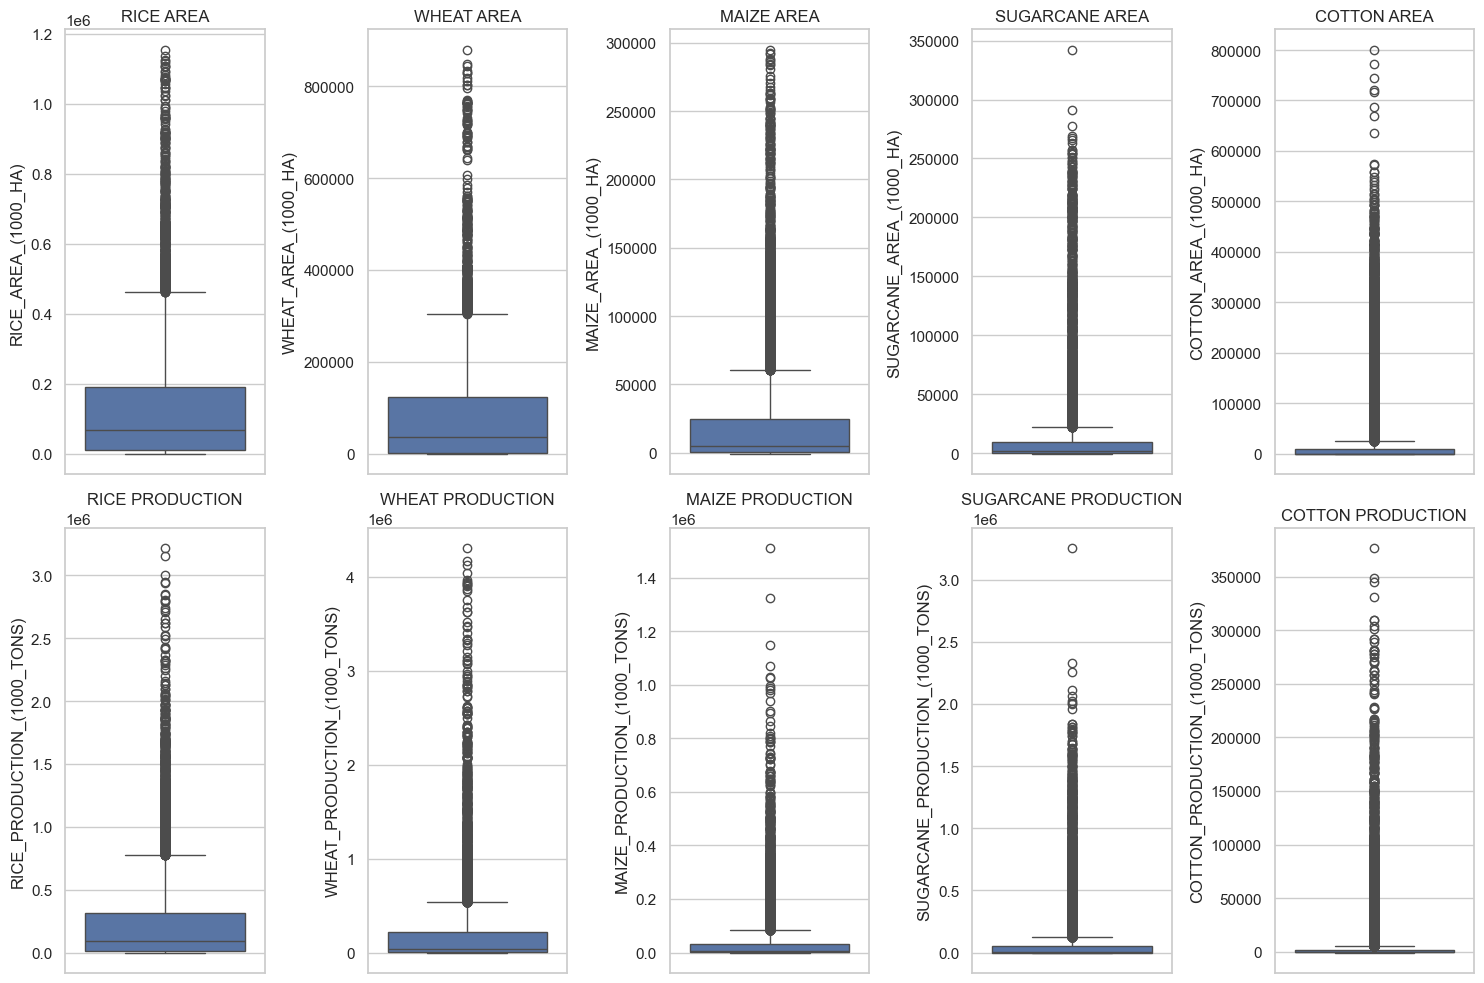

In [67]:
#Boxplots for Area and Production

crops = ["RICE", "WHEAT", "MAIZE", "SUGARCANE", "COTTON"]

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# Loop through each crop and plot area and production
for i, crop in enumerate(crops):
    plt.subplot(2, 5, i + 1)
    sns.boxplot(y=df[f"{crop}_AREA_(1000_HA)"])
    plt.title(f"{crop} AREA")
    
    plt.subplot(2, 5, i + 6)
    sns.boxplot(y=df[f"{crop}_PRODUCTION_(1000_TONS)"])
    plt.title(f"{crop} PRODUCTION")

plt.tight_layout()
plt.show()


In [141]:
# Clean column names: lowercase, replace spaces and remove parentheses
df.columns=(df.columns
            .str.strip()
            .str.lower()
            .str.replace(' ','_')
            .str.replace('(','',regex=False)
            .str.replace(')','',regex=False)
)


In [142]:
print(df.columns.tolist())

['dist_code', 'year', 'state_code', 'state_name', 'dist_name', 'rice_area_1000_ha', 'rice_production_1000_tons', 'rice_yield_kg_per_ha', 'wheat_area_1000_ha', 'wheat_production_1000_tons', 'wheat_yield_kg_per_ha', 'kharif_sorghum_area_1000_ha', 'kharif_sorghum_production_1000_tons', 'kharif_sorghum_yield_kg_per_ha', 'rabi_sorghum_area_1000_ha', 'rabi_sorghum_production_1000_tons', 'rabi_sorghum_yield_kg_per_ha', 'sorghum_area_1000_ha', 'sorghum_production_1000_tons', 'sorghum_yield_kg_per_ha', 'pearl_millet_area_1000_ha', 'pearl_millet_production_1000_tons', 'pearl_millet_yield_kg_per_ha', 'maize_area_1000_ha', 'maize_production_1000_tons', 'maize_yield_kg_per_ha', 'finger_millet_area_1000_ha', 'finger_millet_production_1000_tons', 'finger_millet_yield_kg_per_ha', 'barley_area_1000_ha', 'barley_production_1000_tons', 'barley_yield_kg_per_ha', 'chickpea_area_1000_ha', 'chickpea_production_1000_tons', 'chickpea_yield_kg_per_ha', 'pigeonpea_area_1000_ha', 'pigeonpea_production_1000_tons',

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dist_code                                  16146 non-null  int64  
 1   year                                       16146 non-null  int64  
 2   state_code                                 16146 non-null  int64  
 3   state_name                                 16146 non-null  object 
 4   dist_name                                  16146 non-null  object 
 5   rice_area_1000_ha                          16146 non-null  float64
 6   rice_production_1000_tons                  16146 non-null  float64
 7   rice_yield_kg_per_ha                       16146 non-null  float64
 8   wheat_area_1000_ha                         16146 non-null  float64
 9   wheat_production_1000_tons                 16146 non-null  float64
 10  wheat_yield_kg_per_ha 

In [150]:
# Reshaping the wide dataframe to long format.

# Base columns to include in final table
base_cols = ['year','state_code', 'state_name', 'dist_code','dist_name']
crops = [
    'rice', 'wheat', 'kharif_sorghum', 'rabi_sorghum', 'sorghum',
    'pearl_millet', 'maize', 'finger_millet', 'barley',
    'chickpea', 'pigeonpea', 'minor_pulses',
    'groundnut', 'sesamum', 'rapeseed_and_mustard', 'safflower',
    'castor', 'linseed', 'sunflower', 'soyabean', 'oilseeds',
    'sugarcane', 'cotton'
]

records = []
missing_crops = []

for crop in crops:
    area_col = f"{crop}_area_1000_ha"
    prod_col = f"{crop}_production_1000_tons"
    yield_col = f"{crop}_yield_kg_per_ha"
    
    # Check if columns exist
    if all(col in df.columns for col in [area_col, prod_col, yield_col]):
        temp_df = df[base_cols + [area_col, prod_col, yield_col]].copy()
        temp_df.columns = ['year', 'state_code', 'state_name', 'dist_code','dist_name',
                           'area_ha', 'production_tons', 'yield_kg_per_ha']
        #Multiply area and production to convert to proper units (you’ve already done this, skip if done)
        temp_df['area_ha'] *= 1000
        temp_df['production_tons'] *= 1000
        temp_df['crop_name'] = crop
        records.append(temp_df)
    else:
        missing_crops.append(crop)

# Combine and show info
if records:
    crop_production_df = pd.concat(records, ignore_index=True)
    crop_production_df.dropna(subset=['area_ha', 'production_tons', 'yield_kg_per_ha'], how='all', inplace=True)
    print("✅ crop_production_df created with shape:", crop_production_df.shape)
    print("Missing crops:", missing_crops)
else:
    print("⚠️ No matching crops found. Missing crops:", missing_crops)

✅ crop_production_df created with shape: (371358, 9)
Missing crops: []


In [151]:
crop_production_df.isnull().sum()

year               0
state_code         0
state_name         0
dist_code          0
dist_name          0
area_ha            0
production_tons    0
yield_kg_per_ha    0
crop_name          0
dtype: int64

In [152]:
# Reorder the DataFrame columns to match the SQL table
crop_production_df = crop_production_df[[
    'year', 'state_code', 'state_name', 'dist_code', 'dist_name',
    'crop_name', 'area_ha', 'production_tons', 'yield_kg_per_ha'
]]

In [153]:
crop_production_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371358 entries, 0 to 371357
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   year             371358 non-null  int64  
 1   state_code       371358 non-null  int64  
 2   state_name       371358 non-null  object 
 3   dist_code        371358 non-null  int64  
 4   dist_name        371358 non-null  object 
 5   crop_name        371358 non-null  object 
 6   area_ha          371358 non-null  float64
 7   production_tons  371358 non-null  float64
 8   yield_kg_per_ha  371358 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 25.5+ MB


In [147]:
#Creating a table
query="""CREATE TABLE agri_crop_data (
    id INT AUTO_INCREMENT PRIMARY KEY,
    year INT,
    state_code INT,
    state_name VARCHAR(100),
    dist_code INT,
    dist_name VARCHAR(100),
    crop_name VARCHAR(50),
    area_ha DOUBLE,
    production_tons DOUBLE,
    yield_kg_per_ha DOUBLE
)"""
cursor.execute(query)

In [ ]:
#To view the columns in the table
query="describe agri_crop_data"
cursor.execute(query)
for data in cursor:
    print(data)

('id', 'int', 'NO', 'PRI', None, 'auto_increment')
('year', 'int', 'YES', '', None, '')
('state_code', 'int', 'YES', '', None, '')
('state_name', 'varchar(100)', 'YES', '', None, '')
('dist_code', 'int', 'YES', '', None, '')
('dist_name', 'varchar(100)', 'YES', '', None, '')
('crop_name', 'varchar(50)', 'YES', '', None, '')
('area_ha', 'double', 'YES', '', None, '')
('production_tons', 'double', 'YES', '', None, '')
('yield_kg_per_ha', 'double', 'YES', '', None, '')


In [154]:
insert_query = """
    INSERT INTO agri_crop_data (
        year, state_code, state_name, dist_code, dist_name,
        crop_name, area_ha, production_tons, yield_kg_per_ha
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
"""

data = list(crop_production_df.itertuples(index=False, name=None))
cursor.executemany(insert_query, data)


In [160]:
connection.commit()

In [ ]:
QUERY="SELECT * FROM AGRI_CROP_DATA"
cursor.execute(QUERY)
for data in cursor:
    print(data)

# Read into DataFrame
df = pd.read_sql(QUERY, con=connection)

# Close connection (optional but recommended)
connection.close()

# Check data
print(df.head())

In [162]:
df

,id,year,state_code,state_name,dist_code,dist_name,crop_name,area_ha,production_tons,yield_kg_per_ha
0,1,1966,14,Chhattisgarh,1,Durg,rice,548000.0,185000.0,337.59
1,2,1967,14,Chhattisgarh,1,Durg,rice,547000.0,409000.0,747.71
2,3,1968,14,Chhattisgarh,1,Durg,rice,556300.0,468000.0,841.27
3,4,1969,14,Chhattisgarh,1,Durg,rice,563400.0,400800.0,711.40
4,5,1970,14,Chhattisgarh,1,Durg,rice,571600.0,473600.0,828.55
...,...,...,...,...,...,...,...,...,...,...
371353,371354,2013,15,Jharkhand,917,Singhbhum,cotton,0.0,0.0,0.00
371354,371355,2014,15,Jharkhand,917,Singhbhum,cotton,0.0,0.0,0.00
371355,371356,2015,15,Jharkhand,917,Singhbhum,cotton,0.0,0.0,0.00
371356,371357,2016,15,Jharkhand,917,Singhbhum,cotton,0.0,0.0,0.00


In [ ]:
#EDA Exploratory Data Analysis

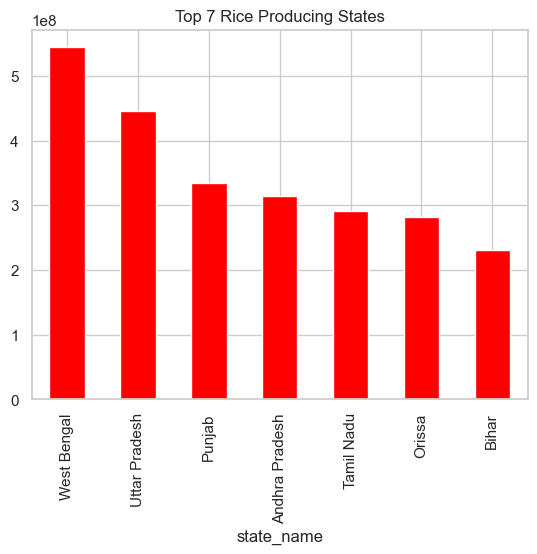

In [389]:
#1.Top 7 RICE PRODUCTION State Data(Bar_plot)
rice_df = df[df['crop_name'] == 'rice']
top_rice_states = rice_df.groupby('state_name')['production_tons'].sum().nlargest(7)
top_rice_states.plot(kind='bar', title='Top 7 Rice Producing States',color='Red')
plt.xlabel=('state_name')
plt.ylabel=('production (tons)')
plt.show()

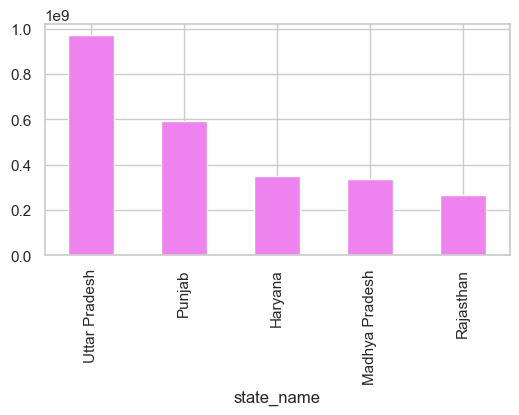

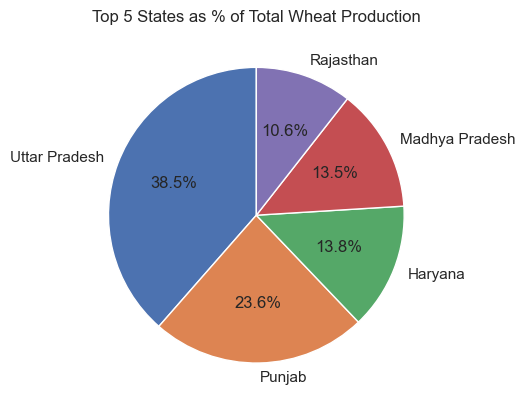

In [393]:
#2.Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)

wheat_df=df[df['crop_name']=="wheat"]
top_wheat_prod_states=wheat_df.groupby('state_name')['production_tons'].sum().nlargest(5)
#Barchart
top_wheat_prod_states.plot(kind='bar',color="violet",figsize=(6,3))
plt.xlabel=('state_name')
plt.ylabel=('production (tons)')
plt.show()
#pie chart
top_wheat_prod_states.plot(kind='pie',autopct='%1.1f%%',startangle=90,legend=False,ylabel='',title='Top 5 States as % of Total Wheat Production')
plt.show()

<Axes: title={'center': 'Top 5 Oil seed production by states'}, xlabel='state_name', ylabel='production_tons'>

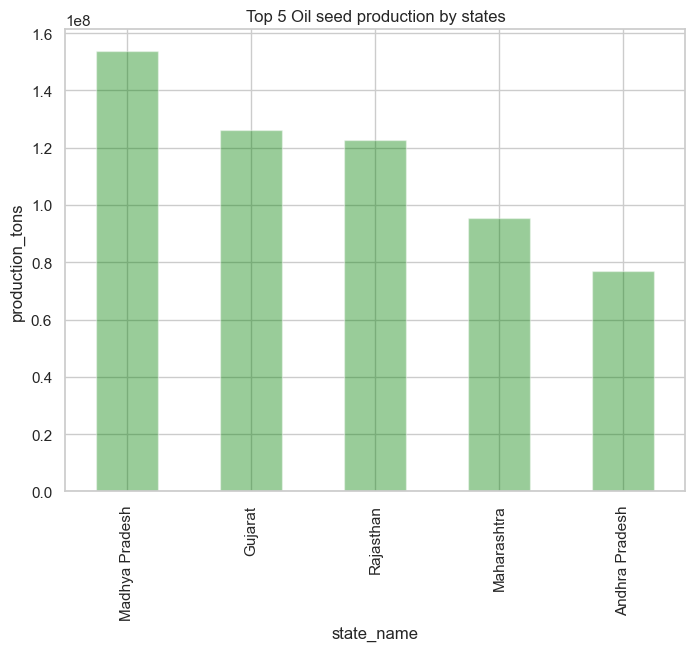

In [229]:
#3.Oil seed production by top 5 states
oilseed_df=df[df['crop_name']=="oilseeds"]
top_oilseed_prod_states=oilseed_df.groupby('state_name')['production_tons'].sum().nlargest(5)
top_oilseed_prod_states.plot(kind="bar",xlabel='state_name',color="green",figsize=(8,6),alpha=0.4,ylabel='production_tons',title="Top 5 Oil seed production by states")

<Axes: title={'center': 'Top 7 sunflower production by states'}, xlabel='state_name', ylabel='production_tons'>

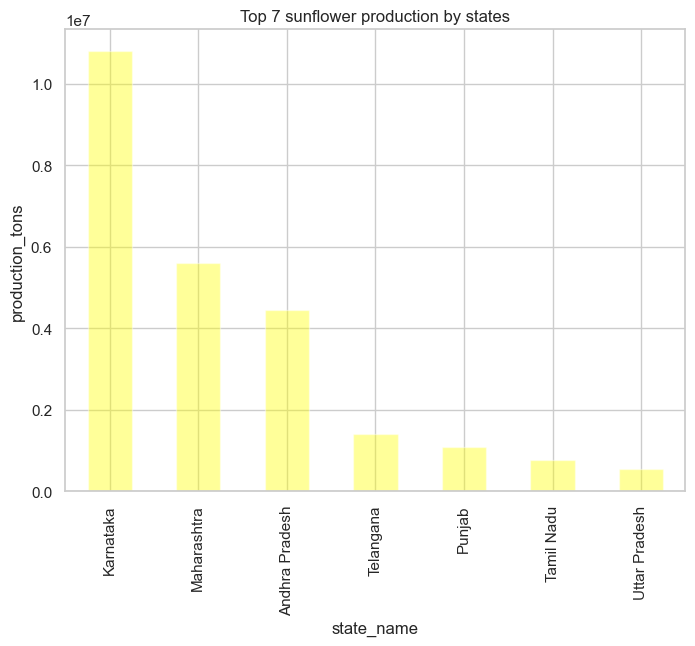

In [230]:
#4.Top 7 Sunflower Producing States
sunflower_df=df[df['crop_name']=="sunflower"]
top_sunflower_prod_states=sunflower_df.groupby('state_name')['production_tons'].sum().nlargest(7)
top_sunflower_prod_states.plot(kind="bar",color="yellow",alpha=0.4,xlabel='state_name',ylabel='production_tons',title="Top 7 sunflower production by states",figsize=(8,6))

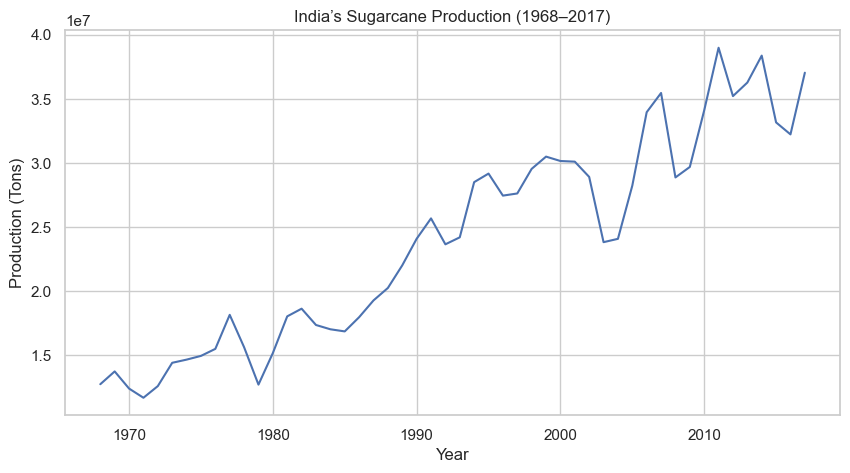

In [ ]:
#5.India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
latest_year = df['year'].max()
start_year = latest_year - 49  # to get last 50 years inclusive
sugar_df=df[df['crop_name']=="sugarcane"]
sugar_50y = sugar_df[(sugar_df['year'] >= start_year)]
sugar_50y = sugar_50y.groupby('year')['production_tons'].sum().sort_index()
sugar_50y.plot(kind='line', title=f"India’s Sugarcane Production ({start_year}–{latest_year})", figsize=(10,5))
plt.ylabel("Production (Tons)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

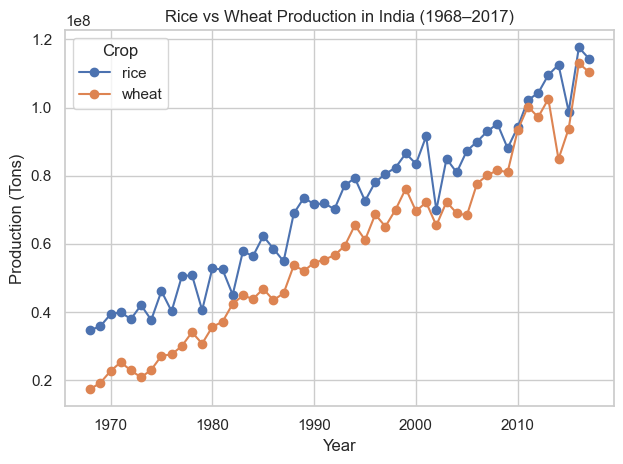

In [240]:
#6.Rice Production Vs Wheat Production (Last 50y)
# Step 1: Filter only Rice and Wheat
rw_df = df[df['crop_name'].isin(['rice', 'wheat'])]

# Step 2: Identify latest year and compute start year
latest_year = rw_df['year'].max()
start_year = latest_year - 49  # for exactly 50 years

# Step 3: Filter for last 50 years
rw_50y = rw_df[rw_df['year'] >= start_year]

# Step 4: Group by year and crop, and sum production
rw_grouped = rw_50y.groupby(['year', 'crop_name'])['production_tons'].sum().unstack()


# Step 5: Plot
plt.figure(figsize=(12, 6))
rw_grouped.plot(kind='line', marker='o', title=f"Rice vs Wheat Production in India ({start_year}–{latest_year})")
plt.xlabel('Year')
plt.ylabel('Production (Tons)')
plt.grid(True)
plt.legend(title="Crop")
plt.tight_layout()
plt.show()

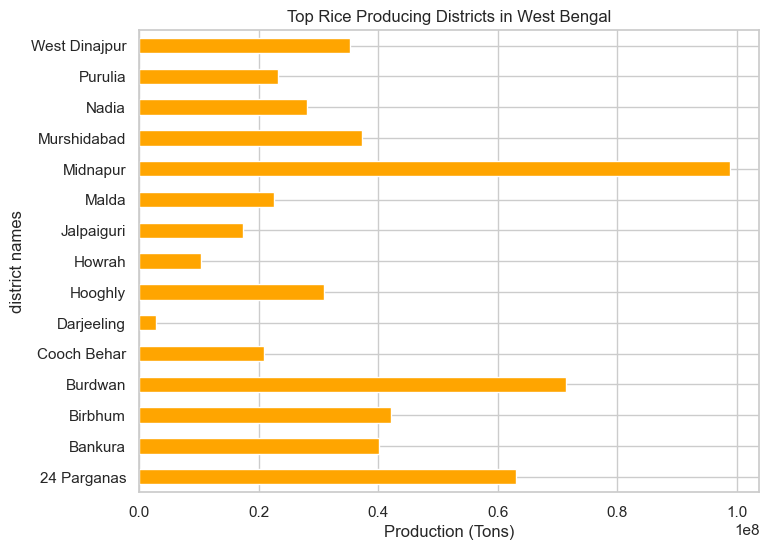

In [253]:
#7.Rice Production By West Bengal Districts
rice_df=df[(df['crop_name']=="rice")  & (df['state_name']== 'West Bengal')]
rice_prod=rice_df.groupby('dist_name')['production_tons'].sum()
rice_prod.plot(kind='barh',color="orange",title="Top Rice Producing Districts in West Bengal",figsize=(8,6))
plt.xlabel('Production (Tons)')
plt.ylabel('district names')
plt.show()

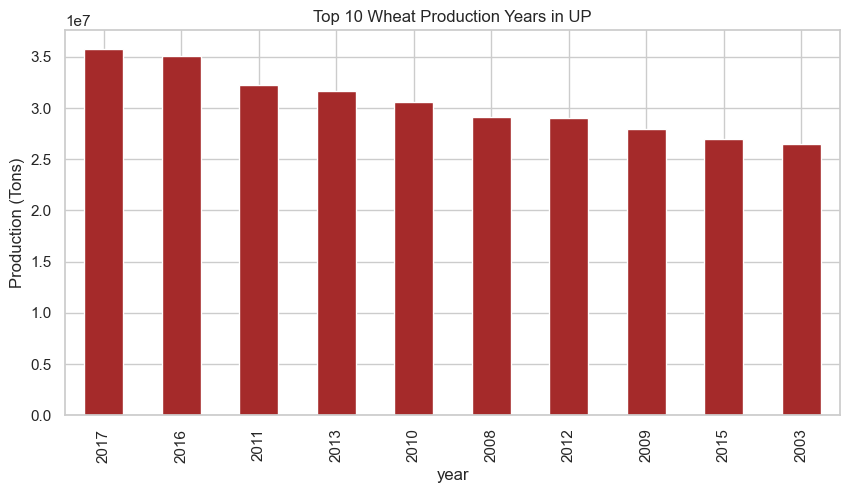

In [ ]:
#8.Top 10 Wheat Production Years From UP

wheat_df=df[(df['crop_name']=="wheat") & (df['state_name']=="Uttar Pradesh")].groupby('year')['production_tons'].sum().nlargest(10)
wheat_df.plot(kind='bar',color="brown", title='Top 10 Wheat Production Years in UP', figsize=(10,5))
plt.ylabel('Production (Tons)')
plt.show()

<Axes: title={'center': 'Millet Production Last 50years from 1968 to 2017'}, xlabel='year'>

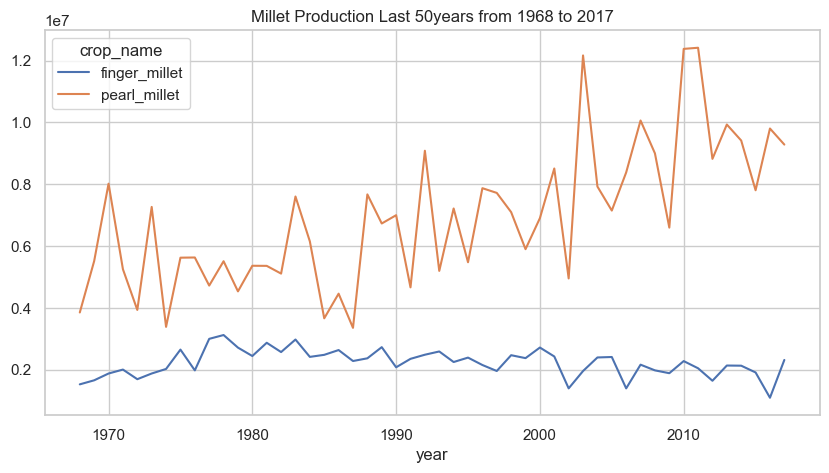

In [273]:
#9.Millet Production (Last 50y)
millets = ['finger_millet', 'pearl_millet']
millet_df=df[df['crop_name'].isin(millets)]
max_year=df['year'].max()
start_year=max_year - 49
millet_df=millet_df[(millet_df['year']>=start_year)]
millet_df_prod=millet_df.groupby(["year","crop_name"])['production_tons'].sum().unstack()
millet_df_prod.plot(kind='line',title=f"Millet Production Last 50years from {start_year} to {max_year}",figsize=(10,5))

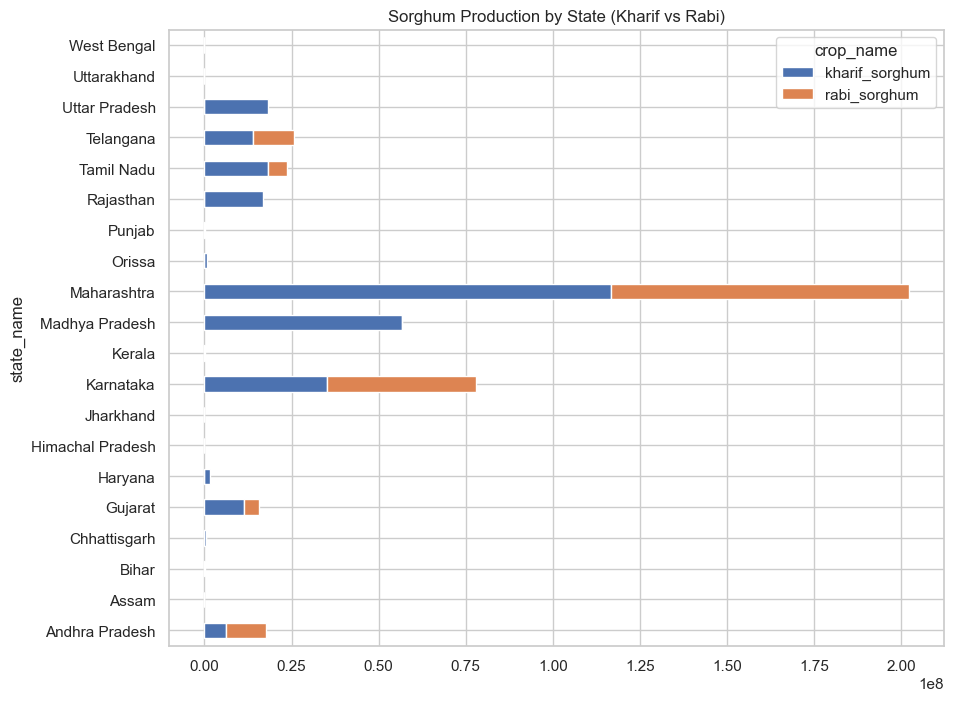

In [299]:
#10.Sorghum Production (Kharif and Rabi) by Region
sorghum_df=df[df['crop_name'].isin(['kharif_sorghum','rabi_sorghum'])]
sorghum_prod=sorghum_df.groupby(["state_name","crop_name"])['production_tons'].sum().unstack()
sorghum_prod.plot(kind="barh",stacked=True, title='Sorghum Production by State (Kharif vs Rabi)', figsize=(10,8))
plt.show()

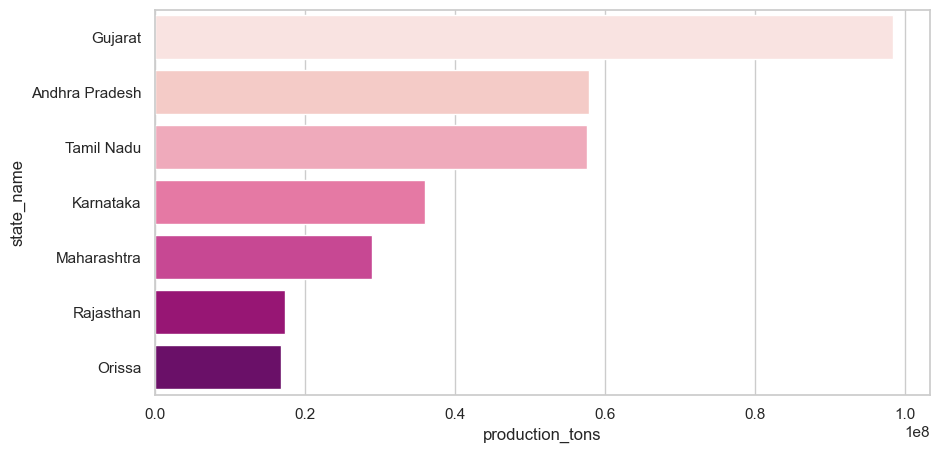

In [386]:
#11.Top 7 States for Groundnut Production

groundnut_df=df[df['crop_name']=="groundnut"]
groundnut_top_states=groundnut_df.groupby("state_name")['production_tons'].sum().nlargest(7).reset_index()
plt.figure(figsize=(10,5))
plt.xlabel=("state_name")
plt.ylabel=("production_tons")
sns.barplot(data=groundnut_top_states, x='production_tons', y='state_name', hue='state_name',palette='RdPu')
plt.show()

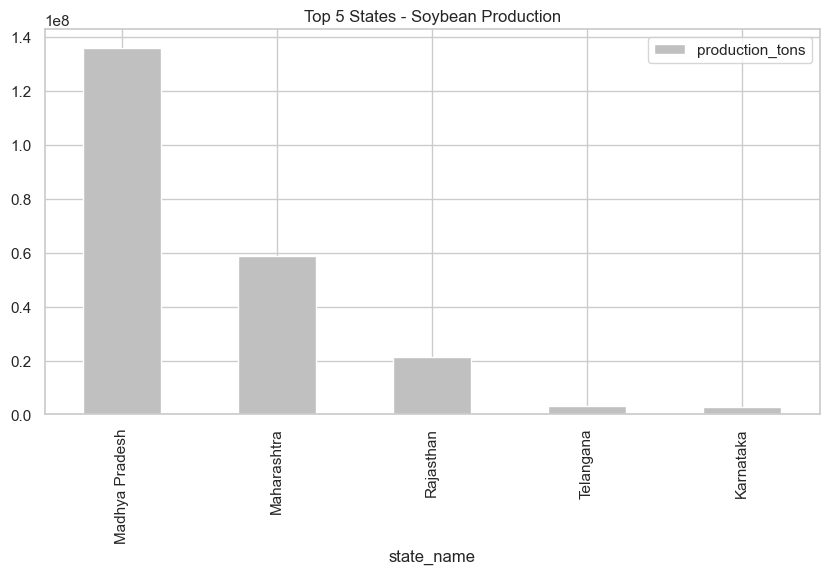

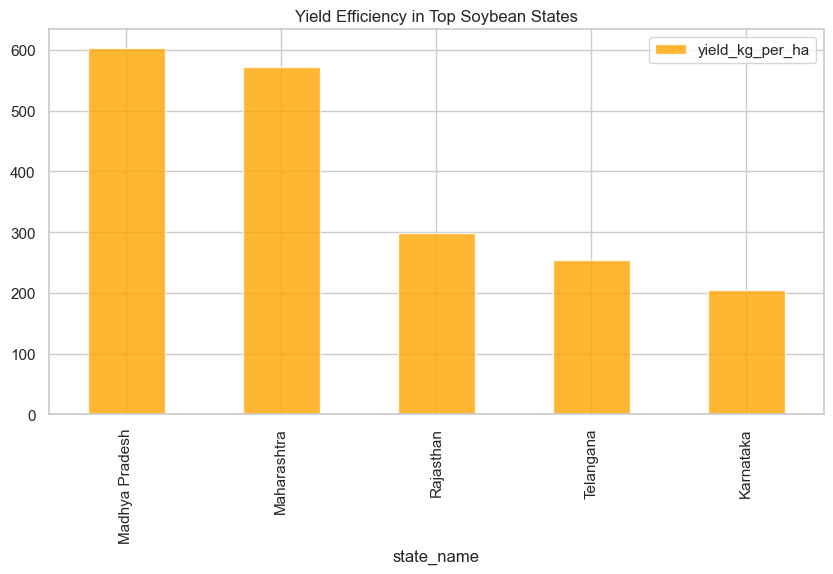

In [325]:
#12.Soybean Production by Top 5 States and Yield Efficiency
soy = df[df['crop_name'] == 'soyabean']
soy_grouped = soy.groupby('state_name').agg({'production_tons':'sum', 'yield_kg_per_ha':'mean'})
top5_soy = soy_grouped.sort_values(by='production_tons', ascending=False).head(5)

top5_soy[['production_tons']].plot(kind='bar', color="silver",title='Top 5 States - Soybean Production', figsize=(10,5))
plt.show()

top5_soy[['yield_kg_per_ha']].plot(kind='bar', color='orange', alpha=0.8,title='Yield Efficiency in Top Soybean States', figsize=(10,5))
plt.show()

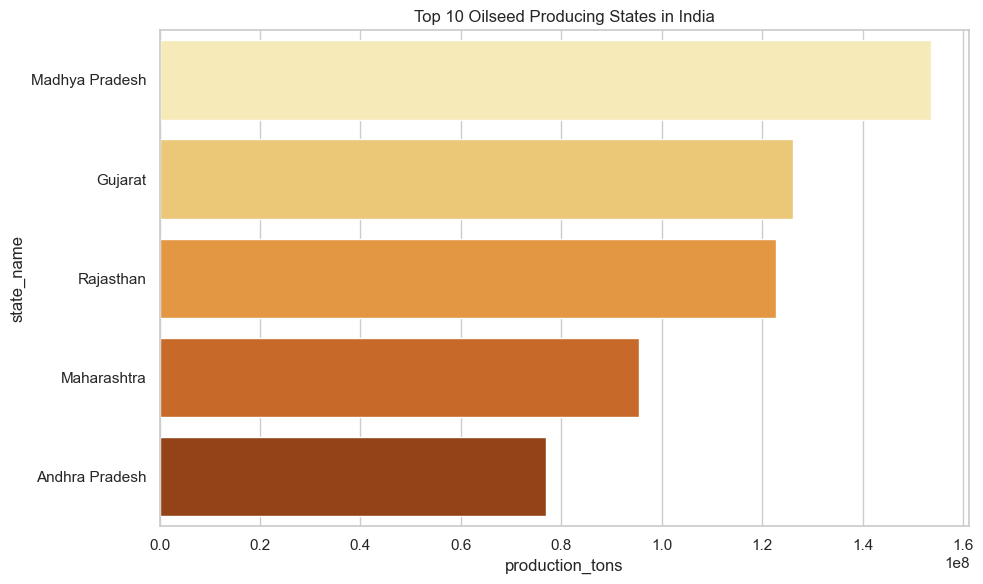

In [355]:
#13. Oilseed Production in Major States

oil = df[df['crop_name'] == 'oilseeds']
top_oil_states = oil.groupby('state_name')['production_tons'].sum().sort_values(ascending=False).reset_index().head(5)
#top_oil_states.plot(kind='bar', title='Oilseed Production in Major States',color="blue",alpha=0.6,figsize=(10,5))
plt.figure(figsize=(10, 6))
sns.barplot(data=top_oil_states, x='production_tons', y='state_name', hue='state_name',palette='YlOrBr')
plt.title('Top 10 Oilseed Producing States in India')
plt.tight_layout()
plt.show()

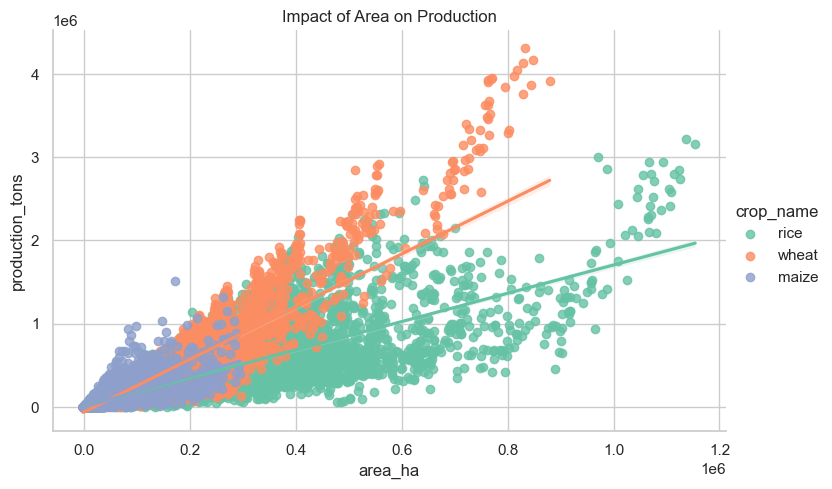

In [372]:
#14.Impact of Area Cultivated on Production (Rice, Wheat, Maize)
imp_crops = df[df['crop_name'].isin(['rice', 'wheat', 'maize'])]
sns.lmplot(data=imp_crops, x='area_ha', y='production_tons', hue='crop_name', aspect=1.5,palette="Set2")
plt.title('Impact of Area on Production')
plt.show()

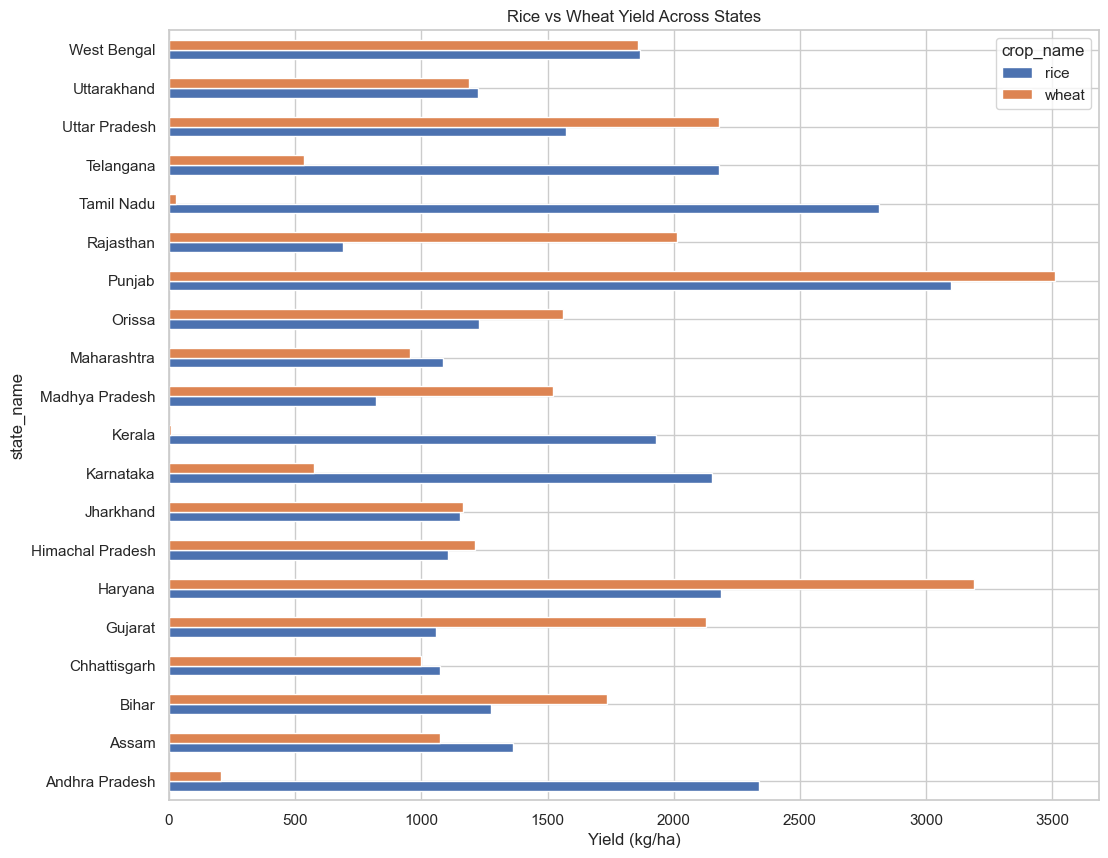

In [395]:
#15.Rice vs. Wheat Yield Across States
import matplotlib.pyplot as plt
rw=df[df['crop_name'].isin(['rice','wheat'])]
rw_yield=rw.groupby(["state_name","crop_name"])['yield_kg_per_ha'].mean().unstack()
rw_yield.plot(kind='barh', title='Rice vs Wheat Yield Across States', figsize=(12,10),xlabel="Yield (kg/ha)")
plt.show()



#SQL QUERIES

In [9]:
#1.Year-wise Trend of Rice Production Across States (Top 3)
query="""select year,state_name,crop_name,sum(production_tons) as total_rice_prod
from agri_crop_data
where crop_name='rice' 
group by state_name,year
order by total_rice_prod desc 
limit 3"""
cursor.execute(query)
for data in cursor:
    print(data)

(2015, 'West Bengal', 'rice', 15948260.0)
(2014, 'West Bengal', 'rice', 15927200.0)
(2017, 'West Bengal', 'rice', 15658940.0)


In [32]:
#2.Top 5 Districts by Wheat Yield Increase Over the Last 5 Years

query="""WITH recent_years AS (
    SELECT DISTINCT year
    FROM agri_crop_data
    WHERE crop_name = 'wheat'
    ORDER BY year DESC
    LIMIT 5
),
wheat_data AS (
    SELECT
        cd.year,
        cd.dist_name,
        cd.yield_kg_per_ha
    FROM agri_crop_data cd
    JOIN recent_years ry ON cd.year = ry.year
    WHERE cd.crop_name = 'wheat'
),
start_year AS (
    SELECT MIN(year) AS year FROM recent_years
),
end_year AS (
    SELECT MAX(year) AS year FROM recent_years
),
start_yield AS (
    SELECT
        dist_name,
        AVG(yield_kg_per_ha) AS start_avg_yield
    FROM wheat_data
    WHERE year = (SELECT year FROM start_year)
    GROUP BY dist_name
),
end_yield AS (
    SELECT
        dist_name,
        AVG(yield_kg_per_ha) AS end_avg_yield
    FROM wheat_data
    WHERE year = (SELECT year FROM end_year)
    GROUP BY dist_name
)
SELECT
    e.dist_name,
    (e.end_avg_yield - s.start_avg_yield) AS yield_increase
FROM end_yield e
JOIN start_yield s ON e.dist_name = s.dist_name
ORDER BY yield_increase DESC
LIMIT 5;"""
cursor.execute(query)
for data in cursor:
    print(data)

('Chamba', 2015.44)
('Vidisha', 1815.15)
('Dewas', 1800.5500000000006)
('Damoh', 1645.57)
('Darjeeling', 1586.63)


In [32]:
#3.States with the Highest Growth in Oilseed Production (5-Year Growth Rate)
query="""WITH oilseed_data AS (
    SELECT
        state_name,
        year,
        SUM(production_tons) AS total_prod
    FROM agri_crop_data
    WHERE LOWER(crop_name) = 'oilseeds'
    GROUP BY state_name, year
),
start_year_data AS (
    SELECT
        state_name,
        total_prod AS prod_start
    FROM oilseed_data
    WHERE year = (SELECT MIN(year) FROM oilseed_data)
),
end_year_data AS (
    SELECT
        state_name,
        total_prod AS prod_end
    FROM oilseed_data
    WHERE year = (SELECT MAX(year) FROM oilseed_data)
)

SELECT
    e.state_name,
    e.prod_end,
    s.prod_start,
    (e.prod_end - s.prod_start) AS absolute_growth,
    ROUND(((e.prod_end - s.prod_start) / s.prod_start) * 100, 2) AS growth_percent
FROM end_year_data e
JOIN start_year_data s ON e.state_name = s.state_name
ORDER BY growth_percent DESC
LIMIT 5;"""
cursor.execute(query)
for data in cursor:
    print(data)


('Andhra Pradesh', 2876520.0, 741920.0, 2134600.0, 287.71)
('Orissa', 535340.0, 183500.0, 351840.0, 191.74)
('Chhattisgarh', 0.0, -6000.0, 6000.0, -100.0)
('Madhya Pradesh', 0.0, -37000.0, 37000.0, -100.0)
('Jharkhand', 0.0, -6000.0, 6000.0, -100.0)


In [38]:
#4.District-wise Correlation Between Area and Production for Major Crops (Rice, Wheat, and Maize)
# using pearson correlation

query="""
SELECT 
    dist_name, 
    crop_name,
    SUM(area_ha * production_tons) AS sum_xy,
    SUM(area_ha) AS sum_x,
    SUM(production_tons) AS sum_y,
    COUNT(*) AS n,
    SUM(POW(area_ha, 2)) AS sum_x2,
    SUM(POW(production_tons, 2)) AS sum_y2,
    ROUND(
        (
            (COUNT(*) * SUM(area_ha * production_tons)) - (SUM(area_ha) * SUM(production_tons))
        ) /
        SQRT(
            (COUNT(*) * SUM(POW(area_ha, 2)) - POW(SUM(area_ha), 2)) *
            (COUNT(*) * SUM(POW(production_tons, 2)) - POW(SUM(production_tons), 2))
        ),
    3) AS correlation
FROM agri_crop_data
WHERE LOWER(crop_name) IN ('rice', 'wheat', 'maize')
GROUP BY dist_name, crop_name
HAVING COUNT(*) > 1
ORDER BY correlation DESC;
"""
cursor.execute(query)
for data in cursor:
    print(data)


('Churu', 'rice', 2000000.0, 1000.0, 2000.0, 52, 1000000.0, 4000000.0, 1.0)
('Jaisalmer', 'rice', 1000000.0, 1000.0, 1000.0, 52, 1000000.0, 1000000.0, 1.0)
('Jhunjhunu', 'rice', 349600.0, 460.0, 760.0, 52, 211600.0, 577600.0, 1.0)
('Jodhpur', 'rice', 100.0, 10.0, 10.0, 52, 100.0, 100.0, 1.0)
('Sikar', 'rice', 70000.0, 500.0, 500.0, 52, 70000.0, 70000.0, 1.0)
('Kinnaur', 'rice', 4042400.0, -2860.0, -2620.0, 52, 4037800.0, 4050600.0, 1.0)
('Lahul & Spiti', 'rice', 2000000.0, -2000.0, -2000.0, 52, 2000000.0, 2000000.0, 1.0)
('Srikakulam', 'wheat', 10000.0, 100.0, 100.0, 52, 10000.0, 10000.0, 1.0)
('West Godavari', 'wheat', 100.0, 10.0, 10.0, 52, 100.0, 100.0, 1.0)
('Dakshina Kannada', 'wheat', 27596800.0, 3920.0, 7040.0, 52, 15366400.0, 49561600.0, 1.0)
('Kodagu / Coorg', 'wheat', 297077000.0, 11950.0, 24860.0, 52, 142802500.0, 618019600.0, 1.0)
('Raigad', 'wheat', 240100.0, 410.0, 610.0, 52, 160100.0, 360100.0, 1.0)
('Ratnagiri', 'wheat', 20000.0, 100.0, 200.0, 52, 10000.0, 40000.0, 1.0)

In [ ]:
#5.Yearly Production Growth of Cotton in Top 5 Cotton Producing States
query="""WITH top_states AS (
    SELECT state_name
    FROM agri_crop_data
    WHERE crop_name = 'cotton'
    GROUP BY state_name
    ORDER BY SUM(production_tons) DESC
    LIMIT 5
)
SELECT year, state_name, SUM(production_tons) AS yearly_cotton_production
FROM agri_crop_data
WHERE crop_name = 'cotton' AND state_name IN (SELECT state_name FROM top_states)
GROUP BY year, state_name
ORDER BY year, state_name;"""
cursor.execute(query)
for data in cursor:
    print(data)

(1966, 'Gujarat', 252000.0)
(1966, 'Haryana', 54300.0)
(1966, 'Maharashtra', 197000.0)
(1966, 'Punjab', 131600.0)
(1966, 'Telangana', 8600.0)
(1967, 'Gujarat', 271000.0)
(1967, 'Haryana', 67800.0)
(1967, 'Maharashtra', 232400.0)
(1967, 'Punjab', 140900.0)
(1967, 'Telangana', 12100.0)
(1968, 'Gujarat', 264000.0)
(1968, 'Haryana', 60700.0)
(1968, 'Maharashtra', 248100.0)
(1968, 'Punjab', 132700.0)
(1968, 'Telangana', 5500.0)
(1969, 'Gujarat', 295300.0)
(1969, 'Haryana', 61500.0)
(1969, 'Maharashtra', 215100.0)
(1969, 'Punjab', 143900.0)
(1969, 'Telangana', 7800.0)
(1970, 'Gujarat', 323900.0)
(1970, 'Haryana', 63200.0)
(1970, 'Maharashtra', 82800.0)
(1970, 'Punjab', 147300.0)
(1970, 'Telangana', 8300.0)
(1971, 'Gujarat', 451400.0)
(1971, 'Haryana', 79200.0)
(1971, 'Maharashtra', 217700.0)
(1971, 'Punjab', 174100.0)
(1971, 'Telangana', 10900.0)
(1972, 'Gujarat', 292700.0)
(1972, 'Haryana', 79300.0)
(1972, 'Maharashtra', 188700.0)
(1972, 'Punjab', 182900.0)
(1972, 'Telangana', 8400.0)
(1973

In [27]:
#6.Districts with the Highest Groundnut Production in 2020
query="""SELECT dist_name, state_name, SUM(production_tons) AS groundnut_production
FROM agri_crop_data
WHERE crop_name = 'groundnut' AND year = 2020
GROUP BY dist_name, state_name
ORDER BY groundnut_production DESC
LIMIT 10
"""
cursor.execute(query)
for data in cursor:
    print(data)

In [72]:
#7.Annual Average Maize Yield Across All States
query="""SELECT state_name,year, round(avg(yield_kg_per_ha),2) AS avg_maize_yield
FROM agri_crop_data
WHERE crop_name = 'maize'
GROUP BY year,state_name
order by year,state_name
"""
cursor.execute(query)
for data in cursor:
    print(data)

('Andhra Pradesh', 1966, 822.73)
('Assam', 1966, 429.13)
('Bihar', 1966, 1011.68)
('Chhattisgarh', 1966, 1129.94)
('Gujarat', 1966, 604.85)
('Haryana', 1966, 867.06)
('Himachal Pradesh', 1966, 1350.13)
('Jharkhand', 1966, 1029.92)
('Karnataka', 1966, 178.07)
('Kerala', 1966, 0.0)
('Madhya Pradesh', 1966, 776.08)
('Maharashtra', 1966, 835.87)
('Orissa', 1966, 876.95)
('Punjab', 1966, 1332.56)
('Rajasthan', 1966, 538.37)
('Tamil Nadu', 1966, 458.33)
('Telangana', 1966, 724.06)
('Uttar Pradesh', 1966, 933.2)
('Uttarakhand', 1966, 286.92)
('West Bengal', 1966, 573.93)
('Andhra Pradesh', 1967, 1193.18)
('Assam', 1967, 443.51)
('Bihar', 1967, 1103.15)
('Chhattisgarh', 1967, 1319.93)
('Gujarat', 1967, 860.16)
('Haryana', 1967, 788.92)
('Himachal Pradesh', 1967, 1591.58)
('Jharkhand', 1967, 1440.16)
('Karnataka', 1967, 831.33)
('Kerala', 1967, 0.0)
('Madhya Pradesh', 1967, 1082.01)
('Maharashtra', 1967, 740.43)
('Orissa', 1967, 894.01)
('Punjab', 1967, 1563.33)
('Rajasthan', 1967, 876.39)
('Ta

In [74]:
#8.Total Area Cultivated for Oilseeds in Each State
query="""SELECT state_name,sum(area_ha) AS total_area
FROM agri_crop_data
WHERE crop_name = 'oilseeds'
GROUP BY state_name
order by total_area desc
"""
cursor.execute(query)
for data in cursor:
    print(data)

('Madhya Pradesh', 189945920.0)
('Rajasthan', 142433470.0)
('Maharashtra', 134069160.0)
('Gujarat', 130724710.0)
('Karnataka', 92527230.0)
('Andhra Pradesh', 87223490.0)
('Tamil Nadu', 56225640.0)
('Uttar Pradesh', 43047070.0)
('Orissa', 39682050.0)
('Telangana', 35293430.0)
('Kerala', 34348940.0)
('Haryana', 21465540.0)
('West Bengal', 20300760.0)
('Chhattisgarh', 17267080.0)
('Assam', 14176640.0)
('Punjab', 8697930.0)
('Bihar', 5536290.0)
('Jharkhand', 2826290.0)
('Uttarakhand', 993530.0)
('Himachal Pradesh', 799250.0)


In [79]:
#9.Districts with the Highest Rice Yield
query="""SELECT state_name,dist_name,round(avg(yield_kg_per_ha),2) AS total_rice_yield
FROM agri_crop_data
WHERE crop_name = 'rice'
GROUP BY dist_name,state_name
order by total_rice_yield desc
limit 10
"""
cursor.execute(query)
for data in cursor:
    print(data)

('Punjab', 'Ludhiana', 3650.43)
('Punjab', 'Sangrur', 3532.9)
('Tamil Nadu', 'Thirunelveli', 3387.51)
('Punjab', 'Bhatinda', 3363.16)
('Tamil Nadu', 'Madurai', 3276.98)
('Tamil Nadu', 'Kanyakumari', 3240.69)
('Punjab', 'Ferozpur', 3234.06)
('Punjab', 'Patiala', 3222.13)
('Punjab', 'Jalandhar', 3187.03)
('Tamil Nadu', 'Salem', 3102.58)


In [110]:
#10.Compare the Production of Wheat and Rice for the Top 5 States Over 10 Years
query="""WITH top_states AS (
    SELECT state_name
    FROM agri_crop_data
    WHERE crop_name IN ('rice', 'wheat')
    GROUP BY state_name
    ORDER BY SUM(production_tons) DESC
    LIMIT 5)
    SELECT year, state_name, crop_name, SUM(production_tons) AS total_production
FROM agri_crop_data
WHERE crop_name IN ('rice', 'wheat')
  AND state_name IN (SELECT state_name FROM top_states)
  AND year >= (SELECT MAX(year) FROM agri_crop_data) - 9
GROUP BY year, state_name, crop_name
ORDER BY year, state_name, crop_name;
"""
cursor.execute(query)
for data in cursor:
    print(data)

(2008, 'Haryana', 'rice', 3299000.0)
(2008, 'Haryana', 'wheat', 11360000.0)
(2008, 'Madhya Pradesh', 'rice', 1036930.0)
(2008, 'Madhya Pradesh', 'wheat', 7272200.0)
(2008, 'Punjab', 'rice', 11000000.0)
(2008, 'Punjab', 'wheat', 15733000.0)
(2008, 'Uttar Pradesh', 'rice', 13080930.0)
(2008, 'Uttar Pradesh', 'wheat', 29110930.0)
(2008, 'West Bengal', 'rice', 15037300.0)
(2008, 'West Bengal', 'wheat', 764500.0)
(2009, 'Haryana', 'rice', 3628000.0)
(2009, 'Haryana', 'wheat', 10488000.0)
(2009, 'Madhya Pradesh', 'rice', 1355600.0)
(2009, 'Madhya Pradesh', 'wheat', 8865300.0)
(2009, 'Punjab', 'rice', 11236000.0)
(2009, 'Punjab', 'wheat', 15169000.0)
(2009, 'Uttar Pradesh', 'rice', 11840150.0)
(2009, 'Uttar Pradesh', 'wheat', 27910800.0)
(2009, 'West Bengal', 'rice', 14340600.0)
(2009, 'West Bengal', 'wheat', 846700.0)
(2010, 'Haryana', 'rice', 3465000.0)
(2010, 'Haryana', 'wheat', 11578000.0)
(2010, 'Madhya Pradesh', 'rice', 1766600.0)
(2010, 'Madhya Pradesh', 'wheat', 9219800.0)
(2010, 'Pun

In [ ]:
# Queries for EDA questions

#1. Top 7 Rice Producing State
query="""SELECT state_name,sum(production_tons) as total_rice_prod
FROM agri_crop_data
WHERE crop_name = 'rice'
GROUP BY state_name
order by total_rice_prod desc
limit 7
"""
cursor.execute(query)
for data in cursor:
    print(data)


('West Bengal', 544232260.0)
('Uttar Pradesh', 445597620.0)
('Punjab', 335040100.0)
('Andhra Pradesh', 315185400.0)
('Tamil Nadu', 291201510.0)
('Orissa', 282532930.0)
('Bihar', 231759000.0)


In [114]:
#2.Top 5 Wheat Producing States with Percentages
query="""WITH total_wheat AS (
    SELECT SUM(production_tons) AS total_production
    FROM agri_crop_data
    WHERE crop_name = 'wheat'
)
SELECT 
    state_name, 
    SUM(production_tons) AS wheat_production,
    ROUND((SUM(production_tons) / (SELECT total_production FROM total_wheat)) * 100, 2) AS percentage
FROM agri_crop_data
WHERE crop_name = 'wheat'
GROUP BY state_name
ORDER BY wheat_production DESC
LIMIT 5;
"""
cursor.execute(query)
for data in cursor:
    print(data)

('Uttar Pradesh', 970210070.0, 33.01)
('Punjab', 593848900.0, 20.21)
('Haryana', 348429600.0, 11.86)
('Madhya Pradesh', 338644250.0, 11.52)
('Rajasthan', 265994990.0, 9.05)


In [ ]:
#3.Oilseed Production by Top 5 States
query="""SELECT state_name,sum(production_tons) as total_oilseeds_prod
FROM agri_crop_data
WHERE crop_name = 'oilseeds'
GROUP BY state_name
order by total_oilseeds_prod desc
limit 5
"""
cursor.execute(query)
for data in cursor:
    print(data)


('Madhya Pradesh', 153594790.0)
('Gujarat', 126224010.0)
('Rajasthan', 122726860.0)
('Maharashtra', 95567910.0)
('Andhra Pradesh', 76888090.0)


In [ ]:
#4.Top 7 Sunflower Producing States
query="""SELECT state_name,sum(production_tons) as total_sunflower_prod
FROM agri_crop_data
WHERE crop_name = 'sunflower'
GROUP BY state_name
order by total_sunflower_prod desc
limit 7
"""
cursor.execute(query)
for data in cursor:
    print(data)


('Karnataka', 10785870.0)
('Maharashtra', 5599460.0)
('Andhra Pradesh', 4447780.0)
('Telangana', 1401060.0)
('Punjab', 1081860.0)
('Tamil Nadu', 762380.0)
('Uttar Pradesh', 552660.0)


In [122]:
5.#India's Sugarcane Production Over the Last 50 Years 
query="""SELECT year, SUM(production_tons) AS total_sugarcane_production
FROM agri_crop_data
WHERE LOWER(crop_name) = 'sugarcane' AND year >= YEAR(CURDATE()) - 50
GROUP BY year
ORDER BY year;
"""
cursor.execute(query)
for data in cursor:
    print(data)


(1975, 14931260.0)
(1976, 15480120.0)
(1977, 18136920.0)
(1978, 15610470.0)
(1979, 12689560.0)
(1980, 15153070.0)
(1981, 18017940.0)
(1982, 18617780.0)
(1983, 17344320.0)
(1984, 17009600.0)
(1985, 16843800.0)
(1986, 17952700.0)
(1987, 19262100.0)
(1988, 20234530.0)
(1989, 22000560.0)
(1990, 24073070.0)
(1991, 25666700.0)
(1992, 23642980.0)
(1993, 24187270.0)
(1994, 28496590.0)
(1995, 29164690.0)
(1996, 27444290.0)
(1997, 27612420.0)
(1998, 29533070.0)
(1999, 30489420.0)
(2000, 30147270.0)
(2001, 30095870.0)
(2002, 28905090.0)
(2003, 23810490.0)
(2004, 24070930.0)
(2005, 28225440.0)
(2006, 33956800.0)
(2007, 35457940.0)
(2008, 28864830.0)
(2009, 29682380.0)
(2010, 34099050.0)
(2011, 38988840.0)
(2012, 35213440.0)
(2013, 36270470.0)
(2014, 38374910.0)
(2015, 33160240.0)
(2016, 32224820.0)
(2017, 37040790.0)


In [ ]:
#6.Rice vs. Wheat Production Over the Last 50 Years
query="""SELECT year, crop_name,SUM(production_tons) AS total_prod
FROM agri_crop_data
WHERE crop_name IN("rice","wheat") AND year >= YEAR(CURDATE()) - 50
GROUP BY year,crop_name
ORDER BY year,crop_name;
"""
cursor.execute(query)
for data in cursor:
    print(data)

In [ ]:
#7. Rice Production by Districts in West Bengal
query="""select dist_name, sum(production_tons) as total_prod
from agri_crop_data
where crop_name="rice" and state_name="West Bengal"
group by dist_name
order by total_prod desc
"""
cursor.execute(query)
for data in cursor:
    print(data)

In [ ]:
#8. Top 10 Wheat Production Years in Uttar Pradesh
query="""select year,sum(production_tons) as total_wheat_prod
from agri_crop_data
where crop_name="wheat" and state_name="Uttar Pradesh"
group by year
order by total_wheat_prod desc
limit 10
"""
cursor.execute(query)
for data in cursor:
    print(data)

In [ ]:
#9. Millet Production Over the Last 50 Years
query="""select year,sum(production_tons) as total_millet_prod
from agri_crop_data
where crop_name LIKE '%millet%' and year>=(year(curdate())-49)
group by year
order by year
"""
cursor.execute(query)
for data in cursor:
    print(data)

In [ ]:
#10. Sorghum Production (Kharif and Rabi) by Region
query="""select state_name,dist_name,crop_name,sum(production_tons) as total_prod
from agri_crop_data
WHERE crop_name LIKE '%Kharif%' OR crop_name LIKE '%Rabi%'
group by state_name,dist_name,crop_name
order by state_name,dist_name,crop_name
"""
cursor.execute(query)
for data in cursor:
    print(data)

In [142]:
#11.Top 7 States for Groundnut Production
query="""select state_name,sum(production_tons) as total_groundnut_prod
from agri_crop_data
WHERE crop_name ="groundnut"
group by state_name
order by total_groundnut_prod desc
limit 7
"""
cursor.execute(query)
for data in cursor:
    print(data)

('Gujarat', 98321420.0)
('Andhra Pradesh', 57844810.0)
('Tamil Nadu', 57662420.0)
('Karnataka', 36033050.0)
('Maharashtra', 29002060.0)
('Rajasthan', 17354290.0)
('Orissa', 16857480.0)


In [28]:
#12.Soybean Production by Top 5 States and Yield Efficiency

query="""SELECT state_name, 
SUM(production_tons) AS total_soyabean_production,
ROUND(SUM(production_tons) / SUM(area_ha), 2) AS yield_efficiency
FROM agri_crop_data
WHERE crop_name = 'soyabean'
GROUP BY state_name
ORDER BY total_soyabean_production DESC
LIMIT 5
"""
cursor.execute(query)
for data in cursor:
    print(data)


('Madhya Pradesh', 136006520.0, 0.99)
('Maharashtra', 58643930.0, 1.07)
('Rajasthan', 21174990.0, 1.11)
('Telangana', 3022130.0, 1.41)
('Karnataka', 2873980.0, 0.82)


In [ ]:
#13. Oilseed Production in Major States
query="""select state_name,sum(production_tons) as total_oilseed_prod
from agri_crop_data
where crop_name="oilseeds"
group by state_name
order by total_oilseed_prod desc
"""
cursor.execute(query)
for data in cursor:
    print(data)

In [ ]:
#14. Impact of Area Cultivated on Production (Rice, Wheat, Maize)
query="""select crop_name,ROUND(SUM(production_tons) / SUM(area_ha), 2) AS yield_per_ha
from agri_crop_data
where crop_name IN ('rice','wheat','maize')
group by crop_name 
"""
cursor.execute(query)
for data in cursor:
    print(data)


In [26]:
#15.Rice vs. Wheat Yield Across States

query="""select state_name,crop_name,round(sum(production_tons)/sum(area_ha),2) as yield_efficiency
from agri_crop_data
where crop_name IN ('rice','wheat')
group by state_name,crop_name
order by state_name,crop_name
"""
cursor.execute(query)
for data in cursor:
    print(data)


('Andhra Pradesh', 'rice', 2.44)
('Andhra Pradesh', 'wheat', 0.61)
('Assam', 'rice', 1.35)
('Assam', 'wheat', 1.15)
('Bihar', 'rice', 1.28)
('Bihar', 'wheat', 1.85)
('Chhattisgarh', 'rice', 1.13)
('Chhattisgarh', 'wheat', 0.87)
('Gujarat', 'rice', 1.52)
('Gujarat', 'wheat', 2.33)
('Haryana', 'rice', 2.74)
('Haryana', 'wheat', 3.54)
('Himachal Pradesh', 'rice', 1.27)
('Himachal Pradesh', 'wheat', 1.28)
('Jharkhand', 'rice', 1.11)
('Jharkhand', 'wheat', 1.29)
('Karnataka', 'rice', 2.29)
('Karnataka', 'wheat', 0.67)
('Kerala', 'rice', 1.78)
('Kerala', 'wheat', None)
('Madhya Pradesh', 'rice', 0.93)
('Madhya Pradesh', 'wheat', 1.68)
('Maharashtra', 'rice', 1.51)
('Maharashtra', 'wheat', 1.11)
('Orissa', 'rice', 1.25)
('Orissa', 'wheat', 1.67)
('Punjab', 'rice', 3.5)
('Punjab', 'wheat', 3.73)
('Rajasthan', 'rice', 1.29)
('Rajasthan', 'wheat', 2.42)
('Tamil Nadu', 'rice', 2.59)
('Tamil Nadu', 'wheat', 0.32)
('Telangana', 'rice', 2.41)
('Telangana', 'wheat', 0.72)
('Uttar Pradesh', 'rice', 1.